In [2]:
import numpy 
import bilby
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science'])
import numpy as np
from gwpy.timeseries import TimeSeries

##### Script to make noise distribution figure in the thesis ###########


/Users/harsh/opt/anaconda3/envs/vanilla/lib/python3.11/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


/Users/harsh/opt/anaconda3/envs/vanilla/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


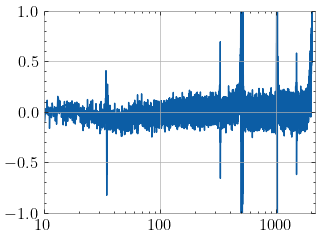

In [3]:

_frame_file = 'L-L1_GWOSC_4KHZ_R1-1126257415-4096.gwf'
trigger_time = 1126259462
duration = 2000
data = TimeSeries.read(_frame_file, channel = 'L1:GWOSC-4KHZ_R1_STRAIN', start = trigger_time + 5, end = trigger_time + 5 + duration)
crop_tag = 1126259462 +  260
crop_data = data.crop(start = crop_tag + 8, end = crop_tag + 8 + 16, copy = True)
crop_data_fft = crop_data.fft()
fft_length = 16
overlap = 4
window = 'hann'
method = 'median'

psd = data.psd(fft_length, overlap, window, method)
plot_psd = False
if plot_psd:
    fig, ax = plt.subplots(1, 1)
    ax.plot(psd.frequencies.value, psd.value)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim(1e-48)
    ax.set_xlim(18)

crop_data_psd = np.interp(crop_data_fft.frequencies.value, psd.frequencies.value, psd.value)

duration_scale = (4/crop_data.duration)
fsamp_scale = 4096
white_crop_data = duration_scale.value * crop_data_fft.value/np.sqrt(crop_data_psd) 

fig, ax = plt.subplots(1, 1)
ax.plot(crop_data_fft.frequencies, white_crop_data)
ax.set_xlim(10,)
ax.set_ylim(-1, 1)
#ax.set_yscale('symlog')
ax.set_xscale('log')



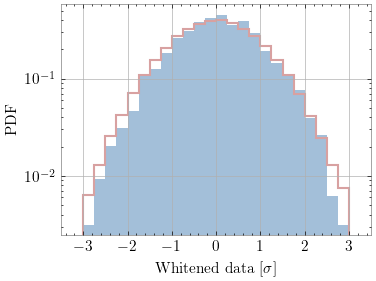

In [13]:

import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science'])
#print(plt.rcParams.keys())
plt.rcParams['axes.labelsize'] = 11.
plt.rc('xtick',labelsize=11)
plt.rc('ytick',labelsize=11)

normal_samples = np.random.normal(0, 1, int(1e5))
#ax.hist(white_crop_data, **kwargs)
mask = np.where((crop_data_fft.frequencies.value > 40) & (crop_data_fft.frequencies.value < 200))[0]
masked_data = white_crop_data[mask]


fig, ax = plt.subplots(1, 1, figsize = (4, 3))
kwargs = {'bins': np.arange(-3, 3.1, 0.25), 'density': 1, 'histtype': 'stepfilled', 'lw': 1.5}
ax.hist(0.39 + np.real(masked_data) * 14., **kwargs, color = '#A3BFD9')
kwargs.update({'histtype':'step'})
ax.hist(normal_samples, **kwargs, color = '#D8A1A1')
ax.set_yscale('log')
ax.set_xlabel('Whitened data [$\sigma$]')
ax.set_ylabel('PDF')
ax.set_xticks(np.arange(-3, 3.1, 1))
ax.set_xlim(-3.5, 3.5)

fig.savefig('./white_noise_distribution.pdf')
fig.savefig('../../figures/white_noise_distribution.pdf')
#kwargs.update({'histtype':'step'})
#ax.set_yscale('log')
#ax.hist(normal_samples, **kwargs)
#ax.set_xlim(-4, 4)
